# First measurements from both sensors

### import relevant modules

In [282]:
import DA_functions as da
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sb

%matplotlib inline 
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

### set path and choose time of measurement

In [283]:
dataPath = '/Users/iditbela/Dropbox/'
start_date = datetime.datetime(2018, 9, 26, 0, 0, 0)
end_date = datetime.datetime(2018, 10, 2, 0, 0, 0)
duration = 10 # measurement duration

# SENSOR-1-SDS021

In [284]:
sensor_no = 1
output_no = 2
times_chosen, times_log = da.getTimes(dataPath,sensor_no,start_date,end_date,log = 'data')
times_1, data_1 = da.getSignalData(dataPath, sensor_no,start_date, end_date, duration, output_no)

In [285]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

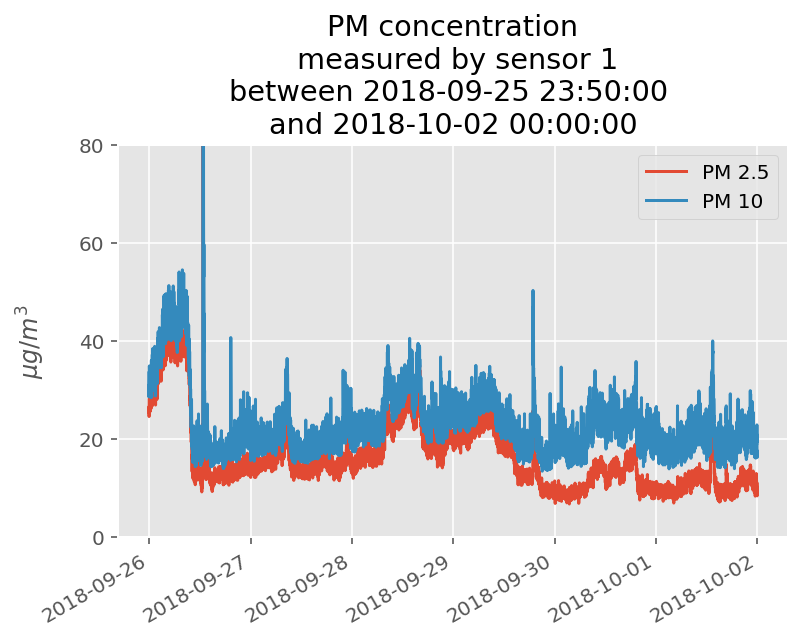

In [286]:
# plot signal SENSOR-1-SDS021
fmt = "%Y-%m-%d %H:%M:%S"
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(times_1, data_1[:,0])
ax.plot(times_1,data_1[:,1])
ax.set_ylim(0,80)
ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
ax.legend(('PM 2.5','PM 10'),loc='upper right')
plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
plt.ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 20
plt.show();

In [287]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# SENSOR-2-PMS5003

In [288]:
sensor_no = 2
output_no = 12
times_chosen, times_log = da.getTimes(dataPath,sensor_no,start_date,end_date,log = 'data')
times_2, data_2 = da.getSignalData(dataPath, sensor_no,start_date, end_date, duration, output_no)

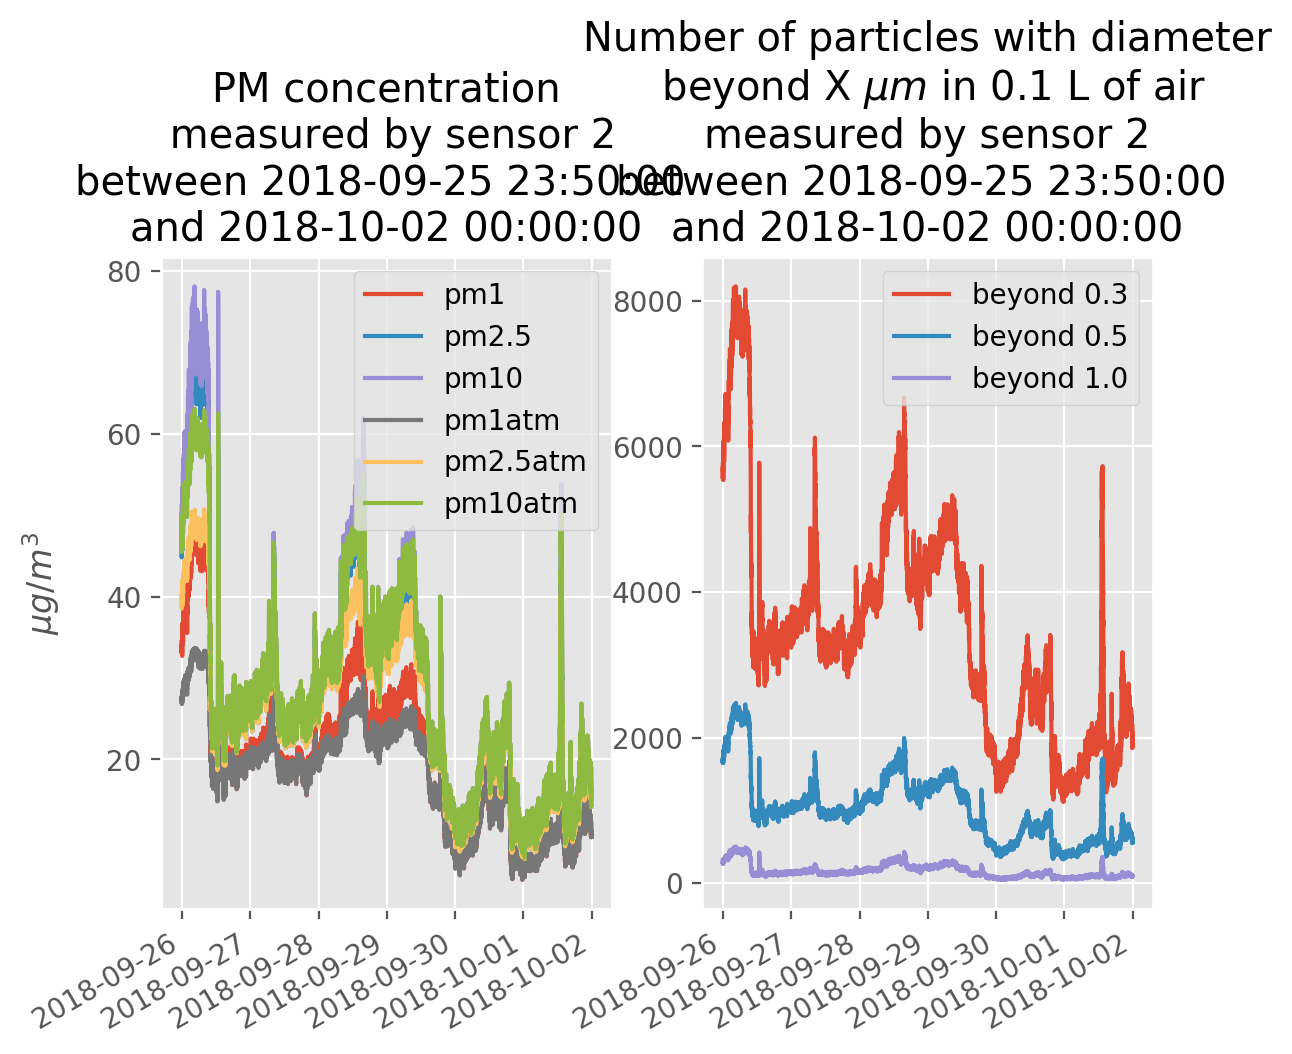

In [289]:
# plot signal SENSOR-2-PMS5003
fmt = "%Y-%m-%d %H:%M:%S"
plt.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=2)

# plot PM
for i in range(6):
    ax[0].plot(times_2, data_2[:,i])
ax[0].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# plot concentration
ax[0].legend(('pm1', 'pm2.5', 'pm10', 'pm1atm', 'pm2.5atm', 'pm10atm'),loc='upper right')
# plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' and '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' \nand '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax[0].xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()

# plot No. of particles
for i in range(3):
    ax[1].plot(times_2, data_2[:,6+i])
ax[1].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# plot concentration
ax[1].legend(('beyond 0.3', 'beyond 0.5', 'beyond 1.0'),loc='upper right')
# plt.title('PM concentration\n measured by sensor '+str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' and '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[1].set_title('Number of particles with diameter\n beyond X '+ r'$\mu m$ ' + 'in 0.1 L of air\n' + 'measured by sensor ' +str(sensor_no)+'\nbetween '+times_2[0].strftime(fmt)+' \nand '+ (times_2[len(times_2)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
# Tell matplotlib to interpret the x-axis values as dates
ax[1].xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()


plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [290]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# Compare signal of both sensors

## PM 2.5 and PM 10

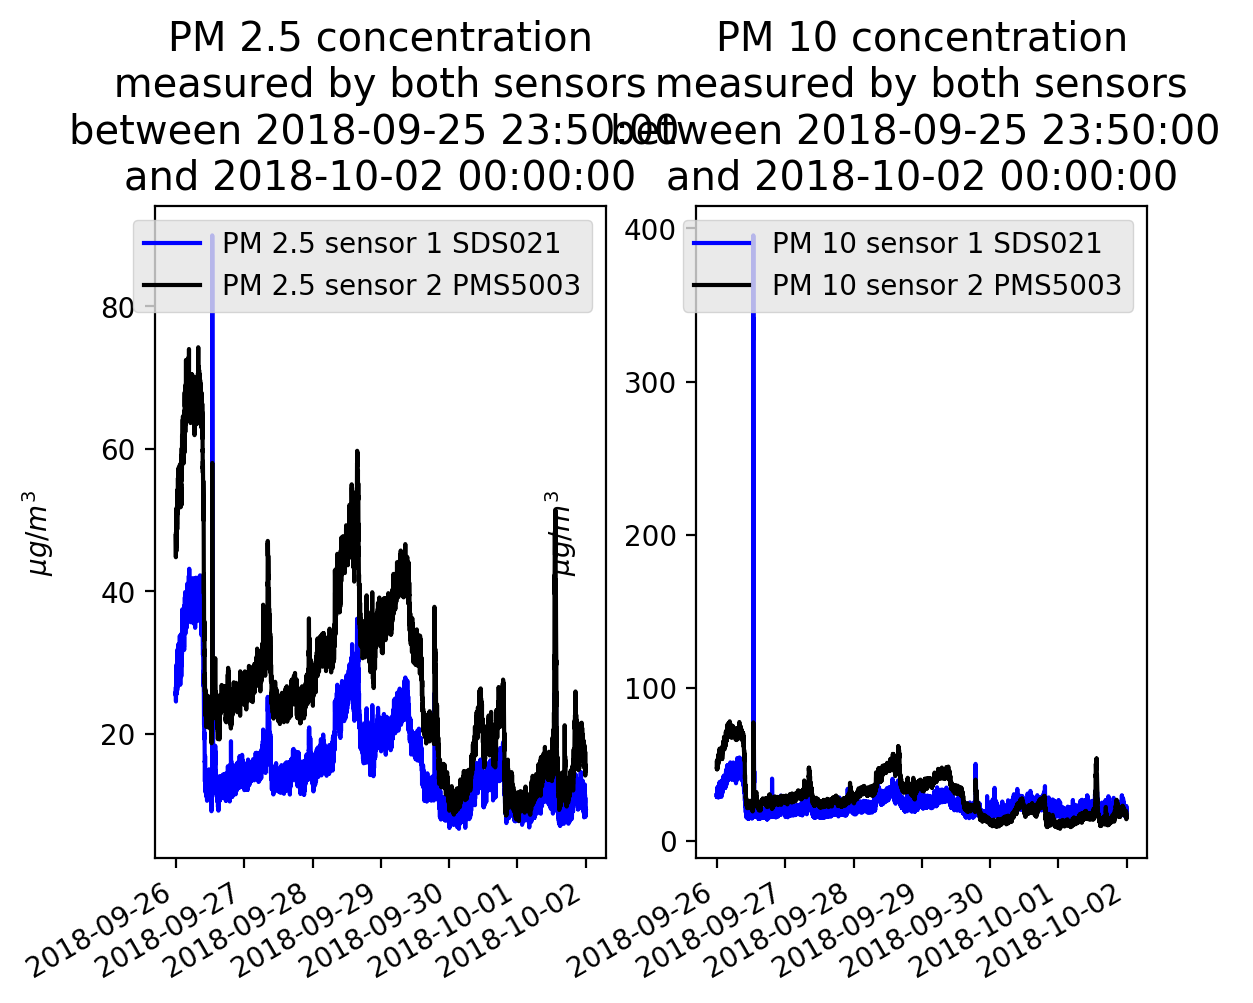

In [291]:

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.style.use('ggplot')

# PM 2.5
ax[0].plot(times_1, data_1[:,0],'b')
ax[0].plot(times_2,data_2[:,1],'k')
ax[0].legend(('PM 2.5 sensor 1 SDS021','PM 2.5 sensor 2 PMS5003'),loc='upper right')
ax[0].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# Tell matplotlib to interpret the x-axis values as dates
ax[0].xaxis_date()
ax[0].set_title('PM 2.5 concentration\n measured by both sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[0].set_ylabel(r'$\mu g/m^3$',labelpad=16)

# PM 10
ax[1].plot(times_1, data_1[:,1],'b')
ax[1].plot(times_2,data_2[:,2],'k')
ax[1].legend(('PM 10 sensor 1 SDS021','PM 10 sensor 2 PMS5003'),loc='upper right')
ax[1].xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))
# Tell matplotlib to interpret the x-axis values as dates
ax[1].xaxis_date()
ax[1].set_title('PM 10 concentration\n measured by both sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
ax[1].set_ylabel(r'$\mu g/m^3$',labelpad=16)

# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [292]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

## Correlation between signals - PM2.5

In [ ]:
#compare cross-correlation / residuals (what is the difference?) for different averaging intervals. 
#plot signal against signal in points?
#FFT for both signals?
#(Do it first on my data?)

#plot the residuals in time - are there any patterns ? 
#I would guess a linear calibration as was performed is not suitable

## Correlation between signals - PM10

# My mac address exposure

## from sensor-1

In [43]:
myMacAdd = 'AC:5F:3E:69:0D:7A'
sensor_no = 1
output_no = 2
seq1 = da.getSignalPerMacAddress(dataPath,sensor_no,start_date,end_date,myMacAdd,output_no,duration)

## from sensor-2

In [45]:
sensor_no = 2
output_no = 12
seq2 = da.getSignalPerMacAddress(dataPath,sensor_no,start_date,end_date,myMacAdd,output_no,duration)

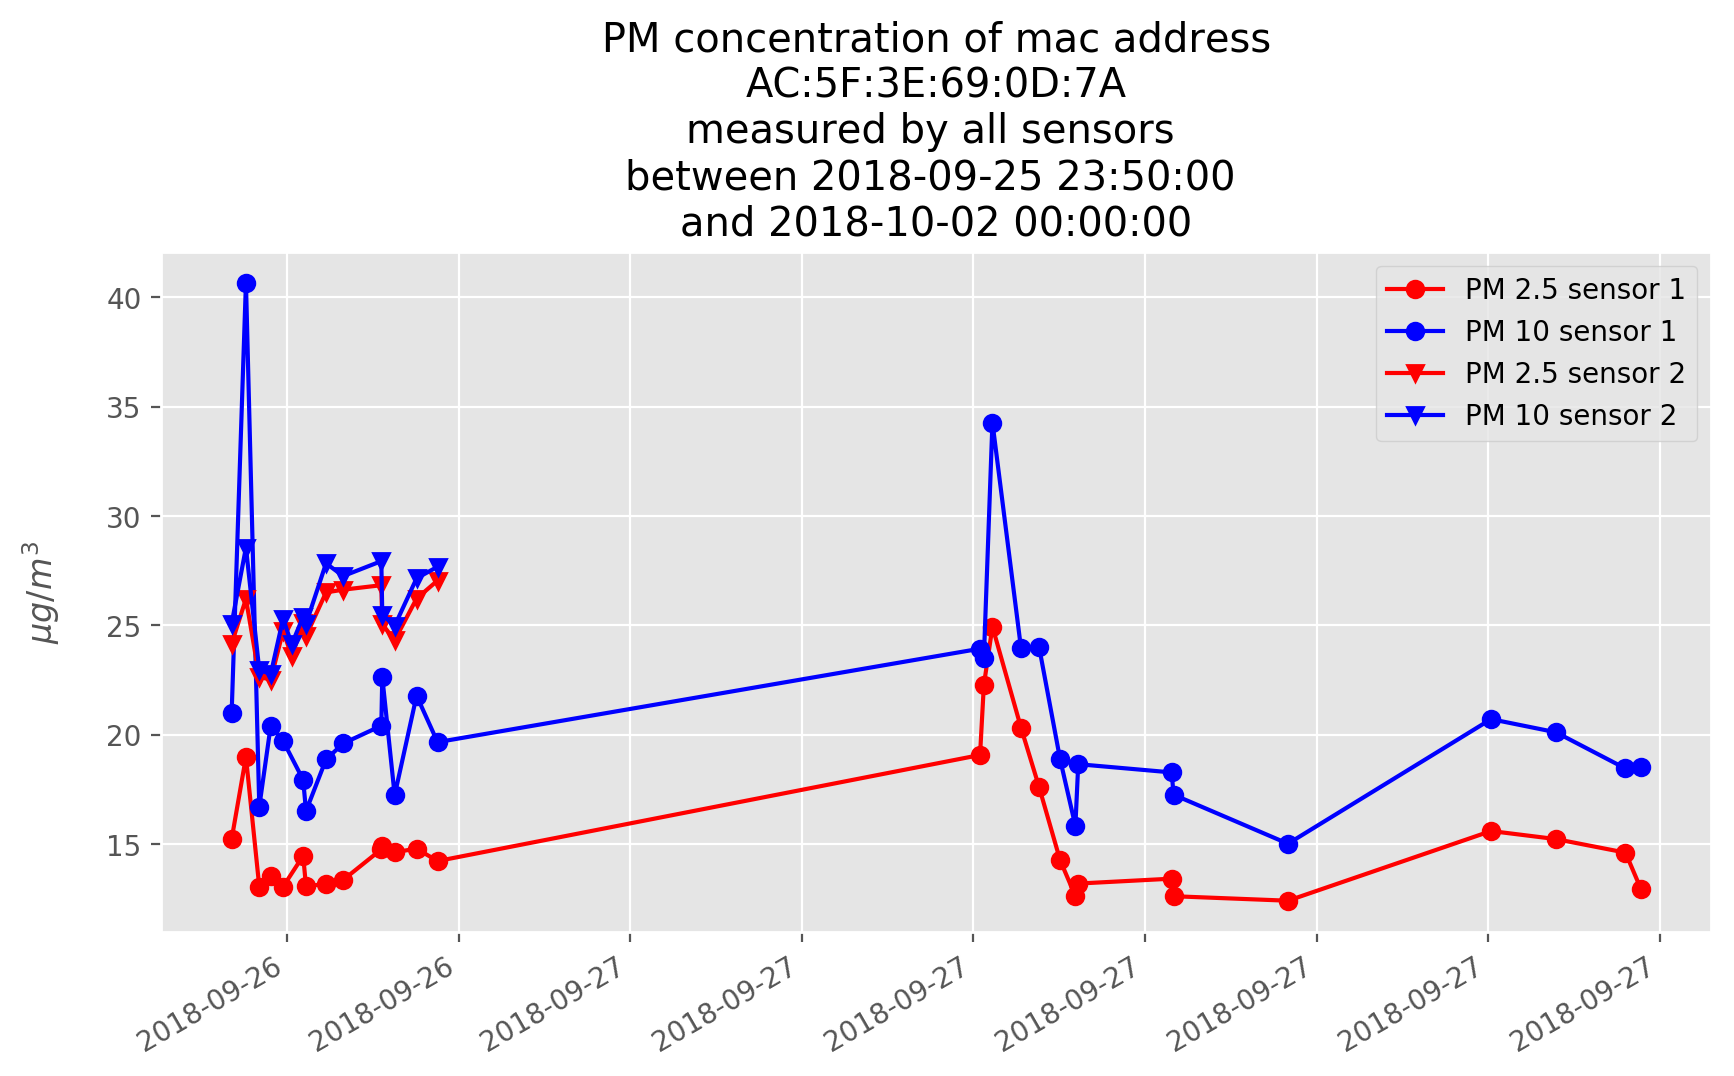

In [46]:
# plot PM2.5 and PM10 from "all" sensors on the same plot 
# plot signal SENSOR-2-PMS5003
%config InlineBackend.figure_format = 'retina'
fmt = "%Y-%m-%d %H:%M:%S"
plt.style.use('ggplot')
fig, ax = plt.subplots()

colors = ['r','b']
markers = ['o','v']
# plot PM seq-1
ax.plot(seq1[:,0], seq1[:,3],marker = markers[0],color = colors[0], label='PM 2.5 sensor 1')
ax.plot(seq1[:,0], seq1[:,4],marker = markers[0],color = colors[1], label='PM 10 sensor 1')

# plot PM seq-2
ax.plot(seq2[:,0], seq2[:,4],marker = markers[1],color = colors[0], label='PM 2.5 sensor 2')
ax.plot(seq2[:,0], seq2[:,5],marker = markers[1],color = colors[1], label='PM 10 sensor 2')

# ax.set_xlim('2018-09-26 16:00:00','2018-09-27 23:00:00')

ax.xaxis.set_major_formatter(md.DateFormatter("%Y-%m-%d"))

ax.legend(loc='upper right')

plt.title('PM concentration of mac address\n' + myMacAdd + '\nmeasured by all sensors '+'\nbetween '+times_1[0].strftime(fmt)+' \nand '+ (times_1[len(times_1)-1]+datetime.timedelta(hours=0, minutes=1)).strftime(fmt))
plt.ylabel(r'$\mu g/m^3$',labelpad=16)
# Tell matplotlib to interpret the x-axis values as dates
ax.xaxis_date()
# Make space for and rotate the x-axis tick labels
fig.autofmt_xdate()


plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 16
plt.show();

In [47]:
plt.close('all')
plt.rcParams.update(plt.rcParamsDefault)

# Particle distributions

### My home measurements 

### Lab measurements 

# Calibration 

Compare measured data from Atzmaut station and SDS021 + PMS5003 + Met-one-804 sensors placed between 10.6 08:00 and 19.6 07:00

## Atzmaus data 

Load AQS data and clean

In [277]:
import pandas as pd

df = pd.read_excel('StationDataAtzmaut.xlsx')
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
# remove weird data at the end
df.drop(df.loc[2869:,:].index, inplace=True)

# change the date to a normal format based on df.loc[0,'date'] and df.loc[len(df)-1,'date']
df.date = pd.date_range(start='06/10/2018',end='06/19/2018 23:00:00',freq='5min')

# reset index
df.reset_index(drop=True, inplace=True)

# now take rows between 10.6.2018 08:00 and 19.6.2018 07:00
mask = (df.date < "2018-06-10 08:00") | (df.date > "2018-06-19 07:00")
df.drop(df.loc[mask,:].index, inplace=True)

# reset index 
df.reset_index(drop=True, inplace=True)

# change negative values to NaN
df['PM2.5'] = np.where(df['PM2.5'] < 0, np.NaN , df['PM2.5'])


In [279]:
# df.head()
# df.tail()

## MET-ONE data 

## Sensors data

In [ ]:
#compare cross-correlation / residuals (what is the difference?) for different averaging intervals. 
#plot signal against signal in points?
#FFT for both signals?
#(Do it first on my data?)

#plot the residuals in time - are there any patterns ? 
#I would guess a linear calibration as was performed is not suitable